# Red Wine Quality Prediction

Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity

2 - volatile acidity

3 - citric 

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 

Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


Download Files:
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
#df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
print("Target/Dependend Variable (Quality)details\n",df["quality"].value_counts())
#df["quality"].value_counts()
print("\n")

print("One of the feature(fixed acidity)\n ",df['fixed acidity'].describe())
print("\n")

print("Check for null values\n",df.isnull().sum())
print("\n")

Target/Dependend Variable (Quality)details
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


One of the feature(fixed acidity)
  count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64


Check for null values
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64




In [4]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:>

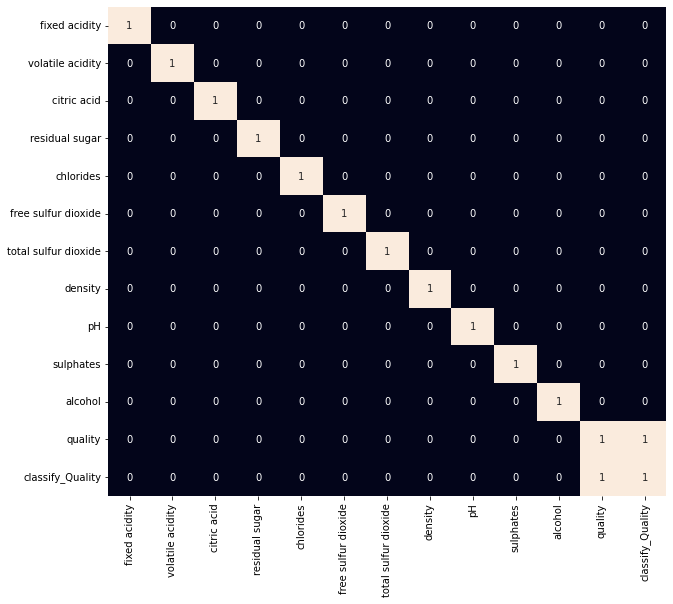

In [5]:
df['classify_Quality'] = [1 if x >=7 else 0 for x in df.quality]
plt.figure(figsize=(10, 9))

sns.heatmap(df.corr() > 0.7,annot=True,cbar=False)

In [6]:
print("Unique Values of new Target variable\n",df["classify_Quality"].unique())
print()
print("New target variable counts \n",df["classify_Quality"].value_counts())
print()
print("DataType of new target varaible\n",df.dtypes["classify_Quality"])

Unique Values of new Target variable
 [0 1]

New target variable counts 
 0    1382
1     217
Name: classify_Quality, dtype: int64

DataType of new target varaible
 int64


In [7]:
print("Check for null values\n",df.isnull().sum())
print()
print("Confirm null \n",df.isnull().sum().sum())
print()

Check for null values
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
classify_Quality        0
dtype: int64

Confirm null 
 0



In [8]:
df.drop("quality",axis=1,inplace=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classify_Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
print("DataFrame Shape \n",df.shape)
print()
df.columns

DataFrame Shape 
 (1599, 12)



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'classify_Quality'],
      dtype='object')

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classify_Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Observations:

count is same for all variables. That means no null values present in the dataset

Mean for "density" is less than median, hence data is left skewed but the difference is very small hence close to normal distribution

Mean for "fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol" are more than median, hence data is right skewed

std is high for 'total sulfur dioxide', 'free sulfur dioxide' that means the data spread is high and range is high

Large difference between 75th percentile and max for 'fixed acidity', 'residual sugar', 'free sulfur dioxide', "total sulfur dioxide"..So outliers are present

In [11]:
df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
classify_Quality        2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

Observations:
1. Max skeweness - "chlorides"
2. Min skeweness - "density"
3. Columns with high skewness: "chlorides","residual sugar","sulphates","total sulfur dioxide","free sulfur dioxide"
4. No need to check skewness on target variable "wine_quality"

Skewness Formula

The acceptable value of skewness is considered to be between -3 and +3. If the value of skewness falls on either side of this range then it indicates that the skewness must be fixed.

Columns with high skewness: "chlorides","residual sugar" >3 can be fixed

# Visualization of the Data


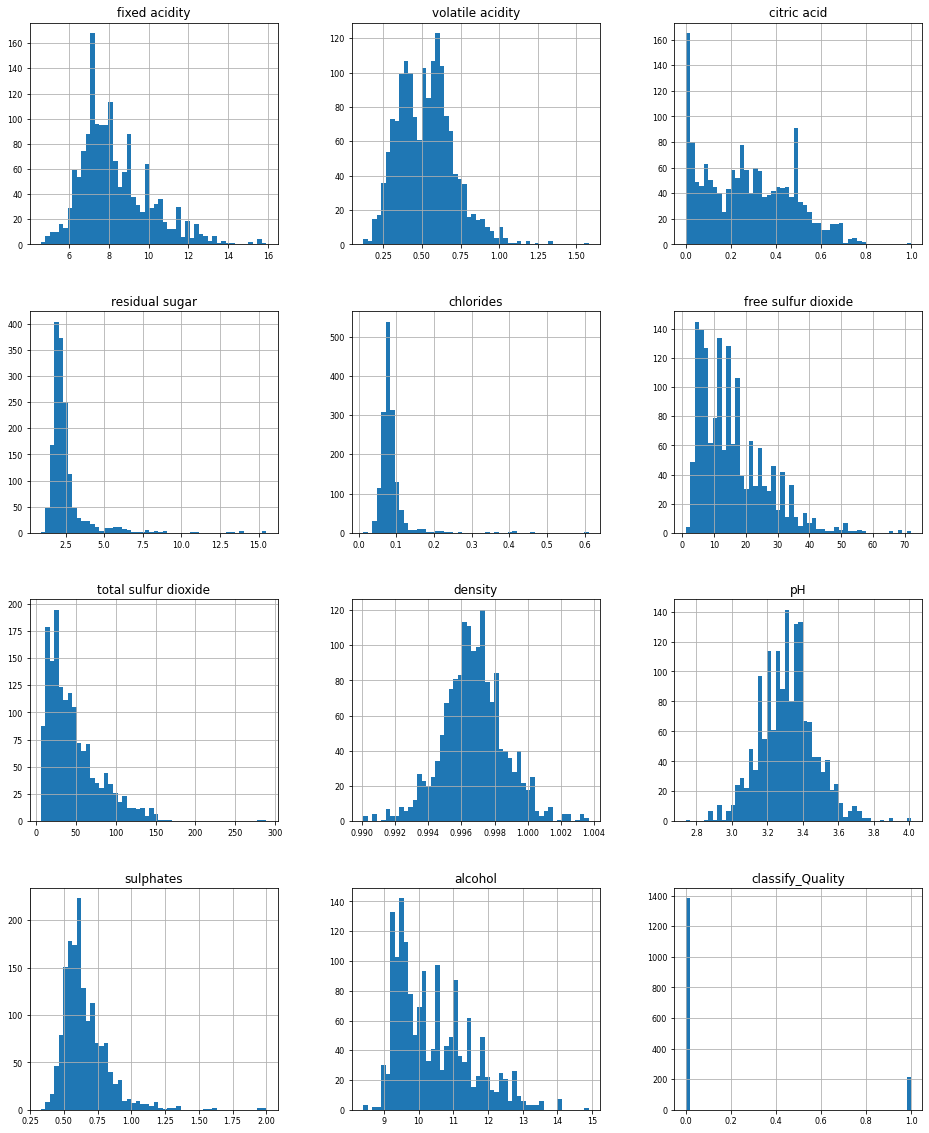

In [12]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

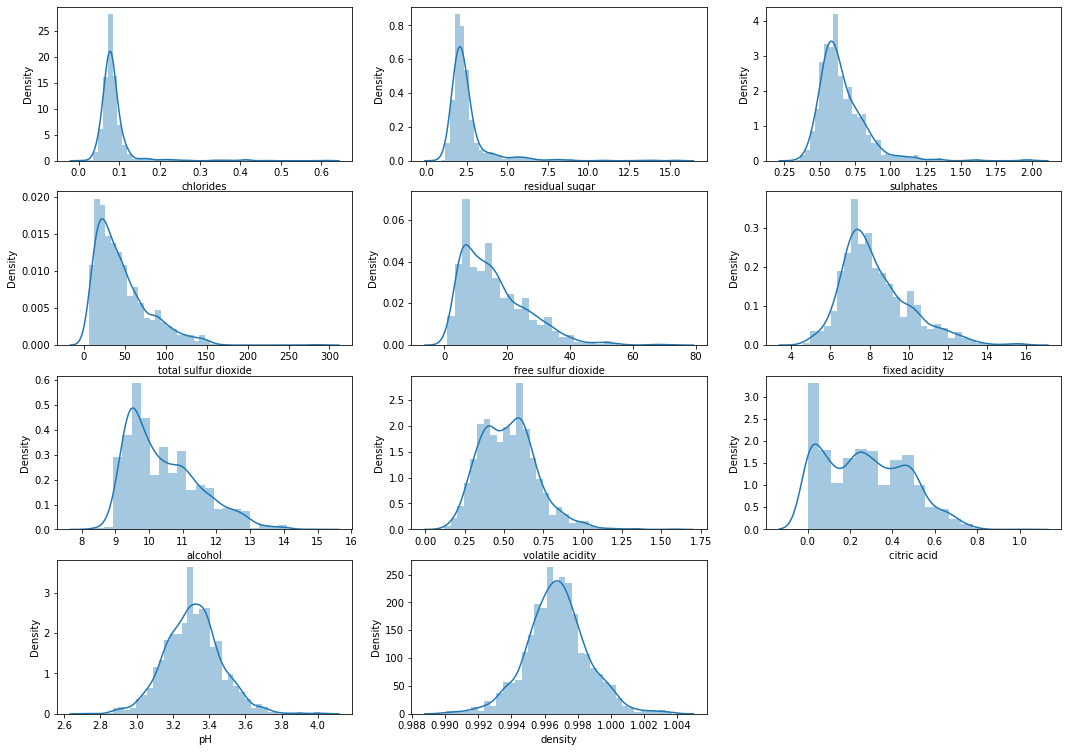

In [13]:
features =['chlorides','residual sugar','sulphates','total sulfur dioxide','free sulfur dioxide','fixed acidity','alcohol'
          ,'volatile acidity','citric acid','pH','density']

plt.subplots(figsize=(18,13))
for i , col in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.distplot(df[col],kde=True)
    
plt.show()

# Check for  Correlation (r)

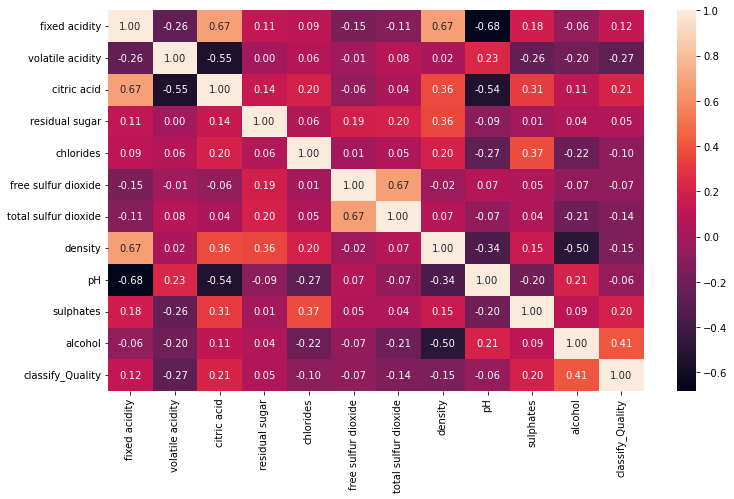

In [14]:
corr = df.corr()
plt.figure(figsize=(12, 7))

sns.heatmap(corr,annot=True,linecolor="black",fmt='.2f');

In [15]:
corr["classify_Quality"].sort_values(ascending=False)

classify_Quality        1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: classify_Quality, dtype: float64

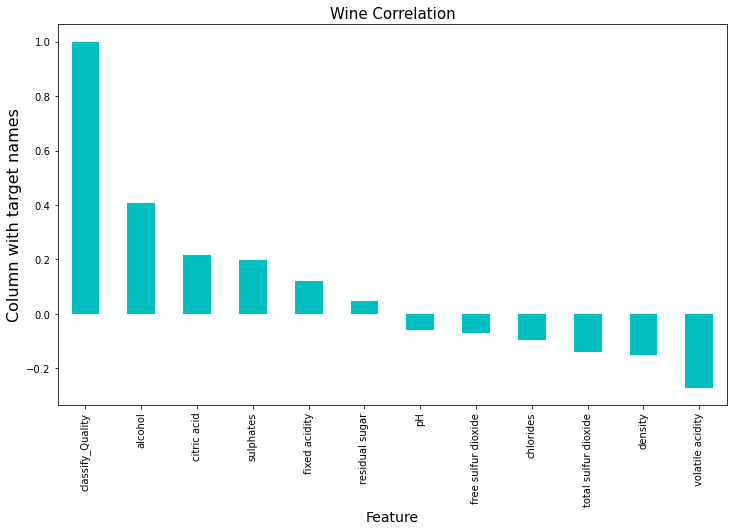

In [16]:
plt.figure(figsize=(12,7))
corr["classify_Quality"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=16)
plt.title("Wine Correlation",fontsize=15)
plt.show()

Observations: (Correlation of Target variable with features) 
1. "residual sugar" and "pH" have weak correlation with target variable "wine_quality"

2. Max correlation: alcohol

3. Min correlation: volatile acidity

# Data Pre-Processing

In [17]:
print(df.columns)
print("\n")

features=df.drop("classify_Quality",axis=1)
print("Independent Variables or Features DataFrame\n")
display(features)

target=df["classify_Quality"]
print("Target or Dependent Variable DataFrame\n")
display(target)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'classify_Quality'],
      dtype='object')


Independent Variables or Features DataFrame



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Target or Dependent Variable DataFrame



0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: classify_Quality, Length: 1599, dtype: int64

# Check for Outliers

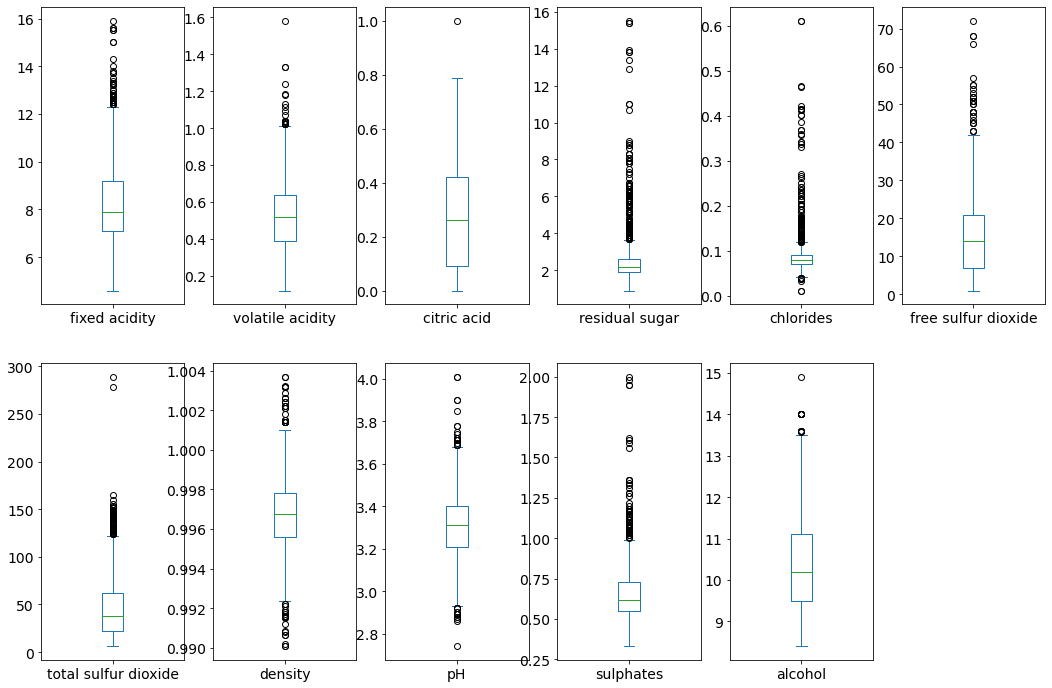

In [18]:
features.plot(kind="box",subplots=True,layout=(2,6),fontsize=14,figsize=(18,12))
plt.show()

Observations:

Columns with more outliers: 

"chlorides","fixed acidity","residual sugar","free sulfur dioxide","density","volatile acidity"

Columns with less outliers:

"citric acid","alcohol","pH","sulphates","total sulfur dioxide"

# Remove Outliers

In [19]:
from scipy.stats import zscore
z =np.abs(zscore(features))
threshold =3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [20]:
print("Check if Outliers exist \n",(np.abs(zscore(features))<3).all().all())
print("\n")
features_new = features[(z<3).all(axis=1)]
target_new = target[(z<3).all(axis=1)]
features = features_new
target = target_new

features.shape ,target.shape

Check if Outliers exist 
 False




((1458, 11), (1458,))

In [21]:
#Dataloss=(1599-1458)/1599*100
Dataloss=(len(df)-len(features_new))/len(df)*100
Dataloss

8.818011257035648

#Observations: 

Data loss is less than 10% which  is acceptable

# Transform data by removing skewness

In [22]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
fixed acidity,0.982751,1.132143
volatile acidity,0.671593,1.225542
citric acid,0.318337,-0.788998
residual sugar,4.540655,28.617595
chlorides,5.680347,41.715787
free sulfur dioxide,1.250567,2.023562
total sulfur dioxide,1.515531,3.809824
density,0.071288,0.934079
pH,0.193683,0.806943
sulphates,2.428672,11.720251


skewness can be interpreted

Fairly Symmetrical	-0.5 to 0.5

Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0

Highly Skewed	< -1.0 and > 1.0

In [23]:
# Method 1: Using PowerTransformer or, QuantileTransformer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
#cols1 = ["chlorides", "residual sugar"]
# cols1 = df.columns
# def test_transformers(columns):
#     pt = PowerTransformer()
#     qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
#     fig = plt.figure(figsize=(20,30))
#     j = 1
#     for i in columns:
#         array = np.array(df[i]).reshape(-1, 1)
#         y = pt.fit_transform(array)
#         x = qt.fit_transform(array)
#         plt.subplot(3,3,j)
#         sns.histplot(array, bins = 50, kde = True)
#         plt.title(f"Original Distribution for {i}")
#         plt.subplot(3,3,j+1)
#         sns.histplot(x, bins = 50, kde = True)
#         plt.title(f"Quantile Transform for {i}")
#         plt.subplot(3,3,j+2)
#         sns.histplot(y, bins = 50, kde = True)
#         plt.title(f"Power Transform for {i}")
#         j += 3
    

        
# test_transformers(cols1)
# ['chlorides','residual sugar','sulphates','total sulfur dioxide','free sulfur dioxide','fixed acidity','alcohol'
#           ,'volatile acidity','citric acid','pH','density']
# x3_n=df.drop(['sulphates','total sulfur dioxide','free sulfur dioxide','fixed acidity','alcohol'
#           ,'volatile acidity','citric acid','pH','density'],axis=1)
# #x3_n=df["chlorides", "residual sugar"]
# x3_n
# pt=PowerTransformer()
# #qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
# x_new_pt=pt.fit_transform(x3_n)
# x_3=pd.DataFrame(data=x_new_pt,columns=x3_n.columns)
# x_3.skew().sort_values(ascending=False)
# #x_3

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(features)
x_1=pd.DataFrame(data=x_new_pt,columns=features.columns)
x_1.skew().sort_values(ascending=False)

alcohol                 0.108436
sulphates               0.021132
fixed acidity           0.019079
citric acid             0.018652
volatile acidity        0.005289
pH                     -0.000062
density                -0.000989
residual sugar         -0.003351
total sulfur dioxide   -0.005751
free sulfur dioxide    -0.021273
chlorides              -0.115179
dtype: float64

Observations:

Skewness range: (+0.115,-0.115)

In [24]:
# Method 2: Using qunitletransform
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_new_qt=qt.fit_transform(features)
x_2=pd.DataFrame(data=x_new_qt,columns=features.columns)
x_2.skew().sort_values(ascending=False)

free sulfur dioxide     0.003991
residual sugar          0.003695
alcohol                 0.003228
sulphates               0.000779
volatile acidity        0.000452
chlorides               0.000295
total sulfur dioxide    0.000283
fixed acidity           0.000257
pH                      0.000047
density                -0.000184
citric acid            -0.052153
dtype: float64

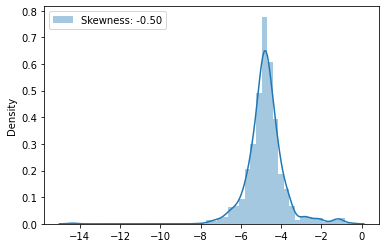

In [25]:
# from scipy import stats
# wine_boxcox =stats.boxcox(df['chlorides'])[0]
# pd.Series(wine_boxcox).skew()

# Box Cox Transform
# Data must be positive
# Imported from scipy
from scipy import stats
Boxcox_Wine = df["chlorides"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Wine= stats.boxcox(Boxcox_Wine)
Boxcox_Wine= pd.Series(Boxcox_Wine[0])
t=sns.distplot(Boxcox_Wine,label="Skewness: %.2f"%(Boxcox_Wine.skew()) )
t.legend()
#from scipy.stats import boxcox

# Box-Cox Transformation in Python
# df.insert(len(df.columns), 'A_Boxcox', 
#               boxcox(df.iloc[:, 0])[0])
#df['A_Boxcox']
# deleting a column
#del df['A_Boxcox']
#df


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

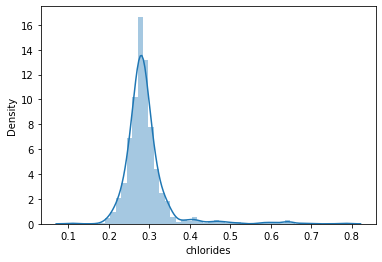

In [26]:
#Sqrt transformation --Another Method
# It is generally used to reduce right skewed data.
sqrt_resp=df["chlorides"]**(0.5)
sns.distplot(sqrt_resp)

# Python Square root transformation
# df.insert(len(df.columns), 'AA_Sqrt', np.sqrt(df.iloc[:,0]))
# sns.distplot(df)
# #deleting a column
# del df['A_Sqrt']
# del df['AA_Sqrt']
# df

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

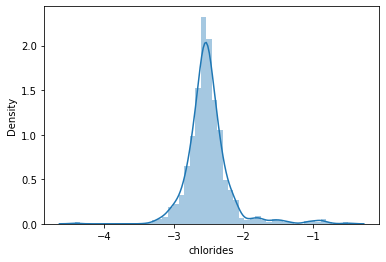

In [27]:
#Log transformation----Another Method
# used for reducing right skewness.it can not be applied to zero or negative values.
log_resp=np.log(df["chlorides"])
sns.distplot(log_resp)

# import numpy as np
# x2=pd.DataFrame()
# x2['chlorides']=np.log(features['chlorides'])
# #sns.distplot(x2['chlorides'])
# #x2.head(10)
# x2.skew().sort_values(ascending=False)

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

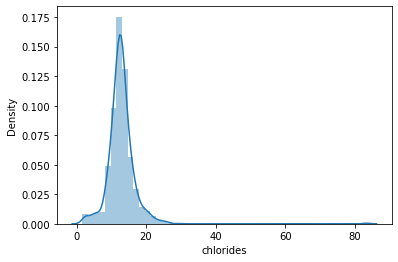

In [28]:
#reciprocal transformation----Another Method
recip_resp=1/df["chlorides"]
sns.distplot(recip_resp)

In [29]:
features=x_2 #Tranformed using qunitletransform
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.343343,0.865866,0.000000,0.251251,0.406406,0.408408,0.472472,0.752252,0.903904,0.285786,0.139640
1,0.465966,0.969970,0.000000,0.769269,0.869870,0.833834,0.811812,0.524024,0.209209,0.683684,0.361862
2,0.465966,0.916416,0.162663,0.595596,0.798298,0.573073,0.720721,0.575576,0.342342,0.608108,0.361862
3,0.925926,0.058559,0.933934,0.251251,0.374374,0.654154,0.764264,0.788288,0.135135,0.363363,0.361862
4,0.343343,0.865866,0.000000,0.251251,0.406406,0.408408,0.472472,0.752252,0.903904,0.285786,0.139640
...,...,...,...,...,...,...,...,...,...,...,...
1453,0.052052,0.678178,0.228729,0.338839,0.770771,0.936937,0.608609,0.129630,0.838839,0.363363,0.591091
1454,0.024525,0.559059,0.270771,0.517518,0.112112,0.982983,0.690190,0.159389,0.913914,0.819319,0.776276
1455,0.064064,0.482983,0.315816,0.595596,0.406406,0.900400,0.558559,0.277277,0.790290,0.804805,0.727728
1456,0.024525,0.773774,0.301301,0.338839,0.374374,0.936937,0.608609,0.219219,0.957457,0.739239,0.509510


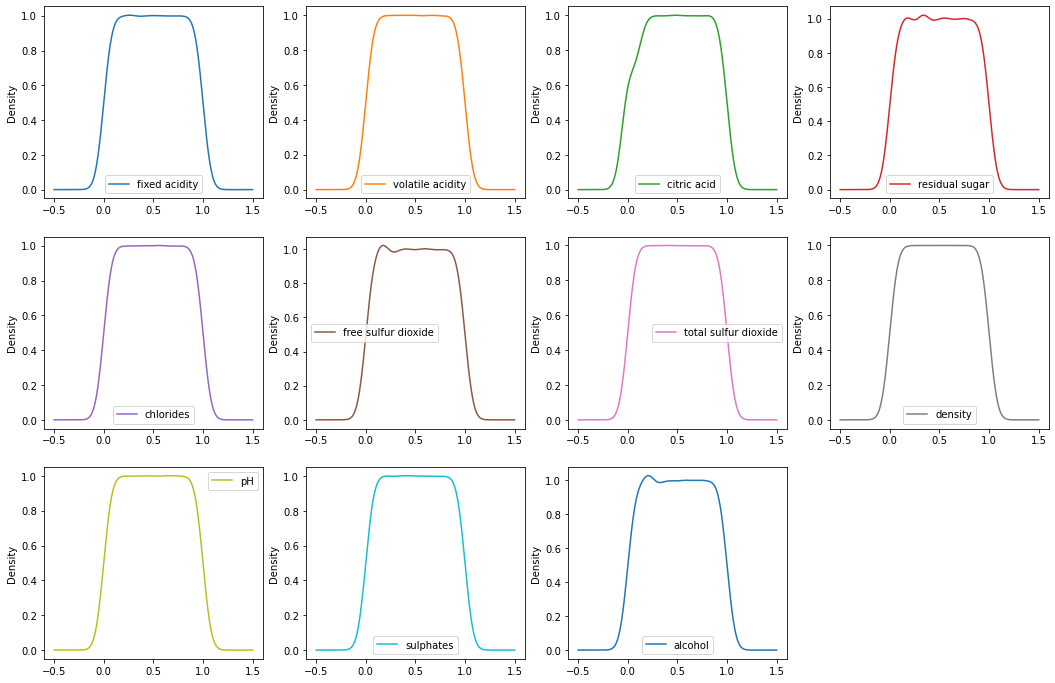

In [30]:
features.plot(kind='density',subplots=True,layout=(3,4),sharex=False,legend=True,fontsize=10,figsize=(18,12))
plt.show()

# Scaling of data

In [31]:
# norm = MinMaxScaler()
# xtrain = norm.fit_transform(xtrain)
# xtest = norm.transform(xtest)

# from sklearn.preprocessing import StandardScaler

# sc=StandardScaler()
# features=sc.fit_transform(features)
# features
# StandardScaler follows Standard Normal Distribution (SND). 
#Therefore, it makes mean = 0 and scales the data to unit variance.

# MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] 
#if there are negative values in the dataset

# using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler 
# for preprocessing the dataset

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
features = scaler.fit_transform(features)
#robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
features


array([[-0.29872674,  0.7182266 , -1.        , ...,  0.8287037 ,
        -0.4453202 , -0.6823638 ],
       [-0.05876592,  0.92315271, -1.        , ..., -0.59927984,
         0.33793103, -0.27239151],
       [-0.05876592,  0.81773399, -0.67532468, ..., -0.32561728,
         0.18916256, -0.27239151],
       ...,
       [-0.84524976, -0.03546798, -0.36963037, ...,  0.59516461,
         0.57635468,  0.40258541],
       [-0.92262488,  0.53694581, -0.3986014 , ...,  0.93878601,
         0.44729064,  0.        ],
       [-0.90989226, -0.79802956,  0.63136863, ...,  0.44187243,
         0.24334975,  0.40258541]])

# SMOTE technique for classfication

Synthetic Minority Over-sampling Technique

In [32]:
print("Checking the value count of target column \n",target.value_counts())

Checking the value count of target column 
 0    1257
1     201
Name: classify_Quality, dtype: int64


In [33]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
smo=SMOTE()
features,target=smo.fit_resample(features,target)
print("Post SMOTE -- value count of target column \n",target.value_counts())

Post SMOTE -- value count of target column 
 0    1257
1    1257
Name: classify_Quality, dtype: int64


# Model 


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()

for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(xtrain,ytrain)
    pred_test=lr.predict(xtest)
    pred_train=lr.predict(xtrain)
    if round(accuracy_score(ytrain,pred_train)*100,2)==round(accuracy_score(ytest,pred_test)*100,2):
        print("At randome state",i, " the model performs well")
        print("At randome state:",i)
        print("Training accuracy is==",accuracy_score(ytrain,pred_train)*100)
        print("Testing accuracy is==",accuracy_score(ytest,pred_test)*100)
        print("Difference between Training and Testing accuracy is==",(accuracy_score(ytest,pred_test)*100)-(accuracy_score(ytrain,pred_train)*100))
        print("\n")

Observations: 
    
As multple random states give same training and testing accuarcy scores, selected random state: 259

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=259)
lr.fit(xtrain,ytrain)
pred_test=lr.predict(xtest)
print("Accuracy score: \n",accuracy_score(ytest,pred_test))
print("\n")
print("Classification metrics report: \n",classification_report(ytest,pred_test))
print("\n")
print("Confusion metrics(TP,FP,FN,TN) Accuracy,Precision,Recall,Sensitivity,Specificity : \n",confusion_matrix(ytest,pred_test))


Accuracy score: 
 0.8330019880715706


Classification metrics report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       235
           1       0.84      0.84      0.84       268

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.83       503
weighted avg       0.83      0.83      0.83       503



Confusion metrics(TP,FP,FN,TN) Accuracy,Precision,Recall,Sensitivity,Specificity : 
 [[193  42]
 [ 42 226]]


# Cross validation(CV) for logistic regression

In [36]:
pred_lr=lr.predict(xtest)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(ytest,pred_lr)
for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    print(" At CV:",j)
    print("Cross validation score is ==",lsc*100)
    print("Model_accuracy_score is ==",lss*100)
    print("Difference b/w Cross validation score and Model accuracy score is ==",lsc-lss)
    print("\n") 

 At CV: 2
Cross validation score is == 78.32140015910899
Model_accuracy_score is == 83.30019880715706
Difference b/w Cross validation score and Model accuracy score is == -0.04978798648048066


 At CV: 3
Cross validation score is == 81.06603023070804
Model_accuracy_score is == 83.30019880715706
Difference b/w Cross validation score and Model accuracy score is == -0.02234168576449025


 At CV: 4
Cross validation score is == 81.10196652253603
Model_accuracy_score is == 83.30019880715706
Difference b/w Cross validation score and Model accuracy score is == -0.021982322846210267


 At CV: 5
Cross validation score is == 81.02524296452363
Model_accuracy_score is == 83.30019880715706
Difference b/w Cross validation score and Model accuracy score is == -0.022749558426334304


 At CV: 6
Cross validation score is == 81.30469371519492
Model_accuracy_score is == 83.30019880715706
Difference b/w Cross validation score and Model accuracy score is == -0.019955050919621353


 At CV: 7
Cross validation 

Observations: 

At CV=10, Difference b/w Cross validation score and Model accuracy score is less hence selected CV=10

In [37]:
lsscore_selected=cross_val_score(lr,features,target,cv=10).mean()
print("The CV score is ==",lsscore_selected*100,"\nThe accuracy score is ==",lss*100)
print("Difference is -->",lss-lsscore_selected)

The CV score is == 82.01637892872952 
The accuracy score is == 83.30019880715706
Difference is --> 0.012838198784275279


# More Classification Algorithms for evaluation

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))
VC_soft=VotingClassifier(estimators=estimator,voting="soft")

models = [XGBClassifier(),SVC(kernel ='rbf'),RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier()
         ,KNeighborsClassifier(),SGDClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),VC_soft]
#models = [LogisticRegression(),SVC(kernel ='rbf')]
Training_accuracy =[]
Testing_accuracy=[]
Diff_Train_Test_accuracy =[]
roc_auc_train_score =[]
roc_auc_test_score =[]
Diff_rocauc_TrainTest_score =[]
model_score=[]
MSE =[]
RMSE=[]

for i in range(11):
    models[i].fit(xtrain,ytrain)
    pred_train=models[i].predict(xtrain)
    pred_test=models[i].predict(xtest)
#     print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",accuracy_score(ytest,pred_test)*100)
#     print(f'{models[i]}: ')
#     print("Training accuracy is==",accuracy_score(ytrain,pred_train)*100)
    Training_accuracy.append(accuracy_score(ytrain,pred_train)*100)
    #     print("Testing accuracy is==",accuracy_score(ytest,pred_test)*100)
    Testing_accuracy.append(accuracy_score(ytest,pred_test)*100)
    #     print("Difference between Training and Testing accuracy is==",(accuracy_score(ytest,pred_test)*100)-(accuracy_score(ytrain,pred_train)*100))
    Diff_Train_Test_accuracy.append((accuracy_score(ytest,pred_test)*100)-(accuracy_score(ytrain,pred_train)*100))
    #     print()
    #print("ROC_AUC Metrics---> \n")
    #print('Training Accuracy : ',metrics.roc_auc_score(ytrain,models[i].predict(xtrain)))
    roc_auc_train_score.append(metrics.roc_auc_score(ytrain,models[i].predict(xtrain)))
    #print('Validation Accuracy: ',metrics.roc_auc_score(ytest,models[i].predict(xtest)))
    roc_auc_test_score.append(metrics.roc_auc_score(ytest,models[i].predict(xtest)))
    #print("Difference between Training and Validation accuracy is",((metrics.roc_auc_score(ytrain,models[i].predict(xtrain))*100)-(metrics.roc_auc_score(ytest,models[i].predict(xtest))*100)))
    rocauc_train1= metrics.roc_auc_score(ytrain,models[i].predict(xtrain))*100
    rocauc_test1= metrics.roc_auc_score(ytest,models[i].predict(xtest))*100
    diffrocauctraintest = rocauc_train1 - rocauc_test1
    Diff_rocauc_TrainTest_score.append(diffrocauctraintest)
    # predicting score
    modelscore = models[i].score(xtest,ytest)
    #print('score of model is : ',modelscore)
    model_score.append(modelscore)
    # display error rate
    #print('calculating the error--->')
    # calculating mean squared error
    MeanSqError = mean_squared_error(ytest,models[i].predict(xtest))
    # calculating root mean squared error
    RootMSE = np.sqrt(MeanSqError)
    # display MSE
    #print('mean squared error is : ',MeanSqError)
    MSE.append(MeanSqError)
    # display RMSE
    #print('root mean squared error is : ',RootMSE)
    RMSE.append(RootMSE)
    #print("\n")
#'Training_accuracy':Training_accuracy,'Testing_accuracy':Testing_accuracy,'Diff_Train_Test_accuracy':Diff_Train_Test_accuracy
ModlesMetrics_list = {'ModelAlgo':models,'Training_accuracy':Training_accuracy,'Testing_accuracy':Testing_accuracy,'Diff_Train_Test_accuracy':Diff_Train_Test_accuracy,'roc_auc_train_score':roc_auc_train_score,'roc_auc_test_score':roc_auc_test_score,'Diff_rocauc_TrainTest_score':Diff_rocauc_TrainTest_score,'model_score':model_score,'MSE':MSE,'RMSE':RMSE}

#'Training_accuracy','Testing_accuracy','Diff_Train_Test_accuracy'
dfModels_Val = pd.DataFrame(ModlesMetrics_list,columns =['ModelAlgo','Training_accuracy','Testing_accuracy','Diff_Train_Test_accuracy','roc_auc_train_score','roc_auc_test_score','Diff_rocauc_TrainTest_score',
                                                        'model_score','MSE','RMSE'])
dfModels_Val

,ModelAlgo,Training_accuracy,Testing_accuracy,Diff_Train_Test_accuracy,roc_auc_train_score,roc_auc_test_score,Diff_rocauc_TrainTest_score,model_score,MSE,RMSE
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",100.000000,96.023857,-3.976143,1.000000,0.958233,4.176723,0.960239,0.039761,0.199403
1,SVC(),90.004973,89.463221,-0.541752,0.900619,0.892474,0.814484,0.894632,0.105368,0.324604
2,"(DecisionTreeClassifier(max_features='sqrt', r...",100.000000,95.029821,-4.970179,1.000000,0.948380,5.161956,0.950298,0.049702,0.222939
3,GaussianNB(),80.258578,79.721670,-0.536908,0.802655,0.797650,0.500499,0.797217,0.202783,0.450315
4,DecisionTreeClassifier(),100.000000,91.053678,-8.946322,1.000000,0.910281,8.971896,0.910537,0.089463,0.299104
5,KNeighborsClassifier(),91.596221,89.264414,-2.331807,0.917205,0.885892,3.131236,0.892644,0.107356,0.327652
6,SGDClassifier(),83.838886,81.709742,-2.129145,0.838811,0.817355,2.145586,0.817097,0.182903,0.427671
7,"(ExtraTreeClassifier(random_state=1951772958),...",100.000000,96.023857,-3.976143,1.000000,0.958233,4.176723,0.960239,0.039761,0.199403
8,([DecisionTreeRegressor(criterion='friedman_ms...,95.375435,90.059642,-5.315793,0.954028,0.898071,5.595676,0.900596,0.099404,0.315283
9,"(DecisionTreeClassifier(max_depth=1, random_st...",89.905520,84.890656,-5.014864,0.899379,0.846419,5.295948,0.848907,0.151093,0.388707


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...): 


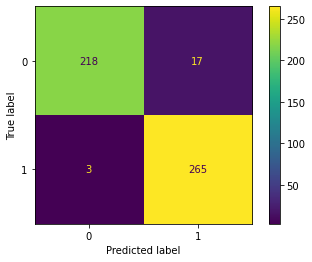



              precision    recall  f1-score   support

           0       0.99      0.93      0.96       235
           1       0.94      0.99      0.96       268

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503

SVC(): 


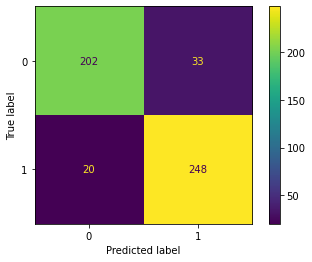



              precision    recall  f1-score   support

           0       0.91      0.86      0.88       235
           1       0.88      0.93      0.90       268

    accuracy                           0.89       503
   macro avg       0.90      0.89      0.89       503
weighted avg       0.90      0.89      0.89       503

RandomForestClassifier(): 


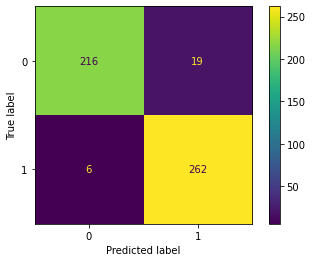



              precision    recall  f1-score   support

           0       0.97      0.92      0.95       235
           1       0.93      0.98      0.95       268

    accuracy                           0.95       503
   macro avg       0.95      0.95      0.95       503
weighted avg       0.95      0.95      0.95       503

GaussianNB(): 


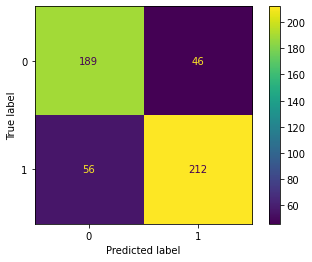



              precision    recall  f1-score   support

           0       0.77      0.80      0.79       235
           1       0.82      0.79      0.81       268

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.80      0.80      0.80       503

DecisionTreeClassifier(): 


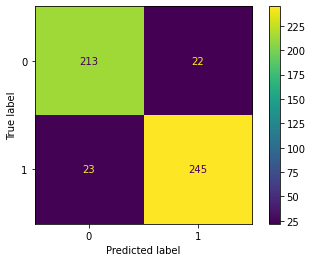



              precision    recall  f1-score   support

           0       0.90      0.91      0.90       235
           1       0.92      0.91      0.92       268

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.91      0.91      0.91       503

KNeighborsClassifier(): 


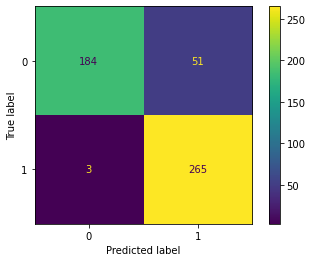



              precision    recall  f1-score   support

           0       0.98      0.78      0.87       235
           1       0.84      0.99      0.91       268

    accuracy                           0.89       503
   macro avg       0.91      0.89      0.89       503
weighted avg       0.91      0.89      0.89       503

SGDClassifier(): 


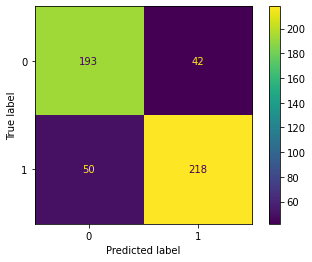



              precision    recall  f1-score   support

           0       0.79      0.82      0.81       235
           1       0.84      0.81      0.83       268

    accuracy                           0.82       503
   macro avg       0.82      0.82      0.82       503
weighted avg       0.82      0.82      0.82       503

ExtraTreesClassifier(): 


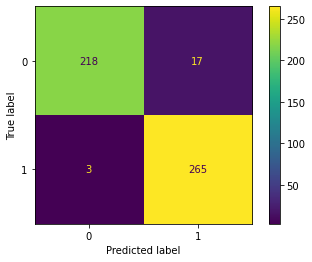



              precision    recall  f1-score   support

           0       0.99      0.93      0.96       235
           1       0.94      0.99      0.96       268

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503

GradientBoostingClassifier(): 


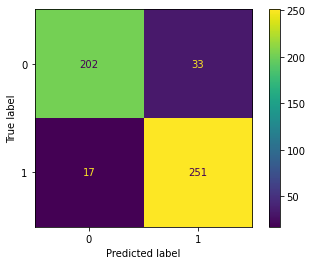



              precision    recall  f1-score   support

           0       0.92      0.86      0.89       235
           1       0.88      0.94      0.91       268

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503

AdaBoostClassifier(): 


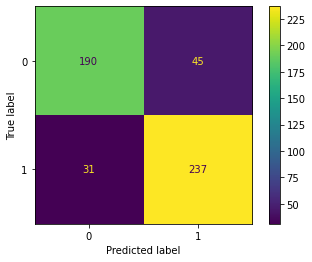



              precision    recall  f1-score   support

           0       0.86      0.81      0.83       235
           1       0.84      0.88      0.86       268

    accuracy                           0.85       503
   macro avg       0.85      0.85      0.85       503
weighted avg       0.85      0.85      0.85       503

VotingClassifier(estimators=[('LR', KNeighborsClassifier()),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DTC', DecisionTreeClassifier())],
                 voting='soft'): 


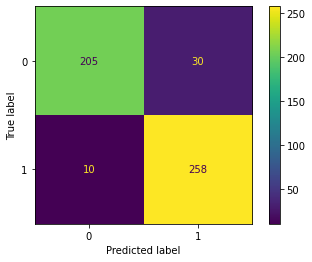



              precision    recall  f1-score   support

           0       0.95      0.87      0.91       235
           1       0.90      0.96      0.93       268

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



In [39]:
for i in range(11):
    print(f'{models[i]}: ')
    metrics.plot_confusion_matrix(models[i],xtest,ytest)
    plt.show()
    print("\n")
    metricreport = metrics.classification_report(ytest,models[i].predict(xtest))
    print(metricreport)

In [40]:
#Cross Validation score for all other models
cvscore =[]
accuracyscore=[]
Diff_cv_accuracy_score =[]
for i in range(11):
    print(f'{models[i]}: ')
    lsscore_selected=cross_val_score(models[i],features,target,cv=10).mean()
    pred_test=models[i].predict(xtest)
    #print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",accuracy_score(ytest,pred_test)*100)
    cvscore.append(lsscore_selected*100)
    accuracyscore.append(accuracy_score(ytest,pred_test)*100)
    #print("Difference is:",lss-lsscore_selected)
    Diff_cv_accuracy_score.append(lss-lsscore_selected)
    #print("\n")

cvmodel_list = {'ModelAlgo':models,'cvscore':cvscore,'accuracyscore':accuracyscore,'Diff_cv_accuracy_score':Diff_cv_accuracy_score}

dfcvmodel_score = pd.DataFrame(cvmodel_list,columns =['ModelAlgo','cvscore','accuracyscore','Diff_cv_accuracy_score'])
                                                                                                                                                                  
dfcvmodel_score

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...): 
SVC(): 
RandomForestClassifier(): 
GaussianNB(): 
DecisionTreeClassifier(): 
KNeighborsClassifier(): 
SGDClassifier(): 
ExtraTreesClassifier(): 
GradientBoostingClassifier(): 
AdaBoostClassifier(): 
VotingClassifier(estimators=[('LR', KNeighborsClassifier()),
                        

,ModelAlgo,cvscore,accuracyscore,Diff_cv_accuracy_score
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",93.157371,96.023857,-0.098572
1,SVC(),86.714096,89.463221,-0.034139
2,"(DecisionTreeClassifier(max_features='sqrt', r...",93.475147,95.029821,-0.101749
3,GaussianNB(),79.712420,79.721670,0.035878
4,DecisionTreeClassifier(),88.065674,91.053678,-0.047655
5,KNeighborsClassifier(),86.829824,89.264414,-0.035296
6,SGDClassifier(),81.219408,81.709742,0.020808
7,"(ExtraTreeClassifier(random_state=1951772958),...",94.708784,96.023857,-0.114086
8,([DecisionTreeRegressor(criterion='friedman_ms...,88.423765,90.059642,-0.051236
9,"(DecisionTreeClassifier(max_depth=1, random_st...",85.319357,84.890656,-0.020192


# Observations:

with all algorithms(LogisticRegression(),XGBClassifier(),SVC(kernel ='rbf'),RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier()
         ,KNeighborsClassifier(),SGDClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),VC_soft)
         checked
 

From the above accuracies we can say that ExtraTreesClassifier  and RandomForestClassifier
performing better on the validation data with less difference between the validation and training data

Howeverfor ---> ExtraTreesClassifier 

will perform hyper parameter tuning as there is less difference between model and cross-validation score 

# Hyper Parameter Tuning

In [41]:
# Hyper parameter tuning on ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [42]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [43]:
#Final_model=ExtraTreesClassifier(GCV.best_params_)

Final_model=ExtraTreesClassifier(criterion=GCV.best_params_['criterion'],max_depth=GCV.best_params_['max_depth'],
                                 n_estimators=GCV.best_params_['n_estimators'], n_jobs=GCV.best_params_['n_jobs']
                                 ,random_state=GCV.best_params_['random_state'])

Final_model.fit(xtrain,ytrain)
pred=Final_model.predict(xtest)
acc=accuracy_score(ytest,pred)
print("Accuracy score--> \n",acc*100)
print()
print("ConfusionMatrix--> \n",confusion_matrix(ytest,pred))
print()
print("classification_report--> \n",classification_report(ytest,pred))

score=cross_val_score(Final_model,features,target,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(ytest,pred)*100)
print()
print("Difference of Accuracy & CV is:",accuracy_score(ytest,pred)-score)

Accuracy score--> 
 96.42147117296223

ConfusionMatrix--> 
 [[218  17]
 [  1 267]]

classification_report--> 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       235
           1       0.94      1.00      0.97       268

    accuracy                           0.96       503
   macro avg       0.97      0.96      0.96       503
weighted avg       0.97      0.96      0.96       503

The CV score is: 94.31131592421916 
The accuracy score is: 96.42147117296223

Difference of Accuracy & CV is: 0.02110155248743073


# AUC ROC Curve
AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1



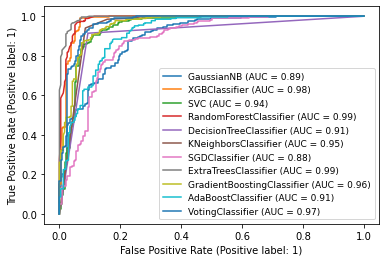

In [44]:
#AUC ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# models = [XGBClassifier(),SVC(kernel ='rbf'),RandomForestClassifier(),GaussianNB(),
#             DecisionTreeClassifier()
#          ,KNeighborsClassifier(),SGDClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),
#          AdaBoostClassifier(),
#         VC_soft]
disp = plot_roc_curve(models[3],xtest,ytest)
plot_roc_curve(models[0],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[1],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[2],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[4],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[5],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[6],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[7],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[8],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[9],xtest,ytest,ax=disp.ax_)
plot_roc_curve(models[10],xtest,ytest,ax=disp.ax_)
#plot_roc_curve(models[11],xtest,ytest,ax=disp.ax_)
plt.legend(prop={'size':9},loc='lower right')
plt.show()


In [45]:
# models = [XGBClassifier(),SVC(kernel ='rbf'),RandomForestClassifier(),GaussianNB(),
#             DecisionTreeClassifier()
#          ,KNeighborsClassifier(),SGDClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),
#          AdaBoostClassifier(),
#         VC_soft]
x_predict = list(models[7].predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)


,predicted_values,original_values
2089,1,1
2115,1,1
1178,0,0
1415,0,0
600,0,0
2460,1,1
2491,1,1
1078,0,0
1828,1,1
2297,1,1


In [46]:
# models = [XGBClassifier(),SVC(kernel ='rbf'),RandomForestClassifier(),GaussianNB(),
#             DecisionTreeClassifier()
#          ,KNeighborsClassifier(),SGDClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),
#          AdaBoostClassifier(),
#         VC_soft]
import numpy as np
orig_data=np.array(ytest)
predict_data=np.array(models[7].predict(xtest))
df_model=pd.DataFrame({"original":orig_data,"predicted":predict_data},index=range(len(orig_data)))
df_model

#ExtraTreesClassifier()---models[7]

,original,predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
498,1,1
499,0,0
500,0,0
501,1,1


# Saving the Model 

In [47]:
import pickle
file = 'redwinequality'
#ExtraTreesClassifier()---models[7]
save = pickle.dump(models[7],open('modelExtraTree_redwine.pkl','wb'))

# pickl_model_redwine = pickle.load(open('modelExtraTreeClass_redwine.pkl','rb'))
# pickl_model_redwine.predict(xtest)

# Conclusion

In [48]:
#ExtraTreesClassifier()---models[7]
pickl_model_redwine = pickle.load(open('modelExtraTree_redwine.pkl','rb'))
score=pickl_model_redwine.predict(xtest)
#print(score)

conclusion=pd.DataFrame([pickl_model_redwine.predict(xtest)[:],ytest[:]],index=["Predicted","Original"])
conclusion.T

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
498,1,1
499,0,0
500,0,0
501,1,1
